In [1]:
%load_ext autoreload

%autoreload 2


# Code to Record minimum TE achievable Part 2
This code calls the .csv files generated in part 1 to make figures showing the TEs for GrOpt vs. TRAP waveforms and the differences

T2s for GM and WM come from literature reported here: https://www.mri-q.com/uploads/3/4/5/7/34572113/stanisz_et_al-2005-magnetic_resonance_in_medicine.pdf

T2s for liver average of reuslts here: https://link.springer.com/article/10.1007/s10334-023-01135-6#:~:text=The%20normal%20range%20for%20global,ms%2D54%20ms%20in%20females.



In [2]:
import numpy as np
import sys
sys.path.append('/Users/ariel/Documents/GitHub/pypulseq')
import pypulseq as pp

sys.path.append("utils/")
from trap_waveforms import *


sys.path.append("utils/gropt/python")
import gropt
from helper_utils import *

from matplotlib import pyplot as plt
import numpy as np
from numpy import arctan2, sqrt
import numexpr as ne

import pandas as pd

In [3]:
mmt = 2
system = 45

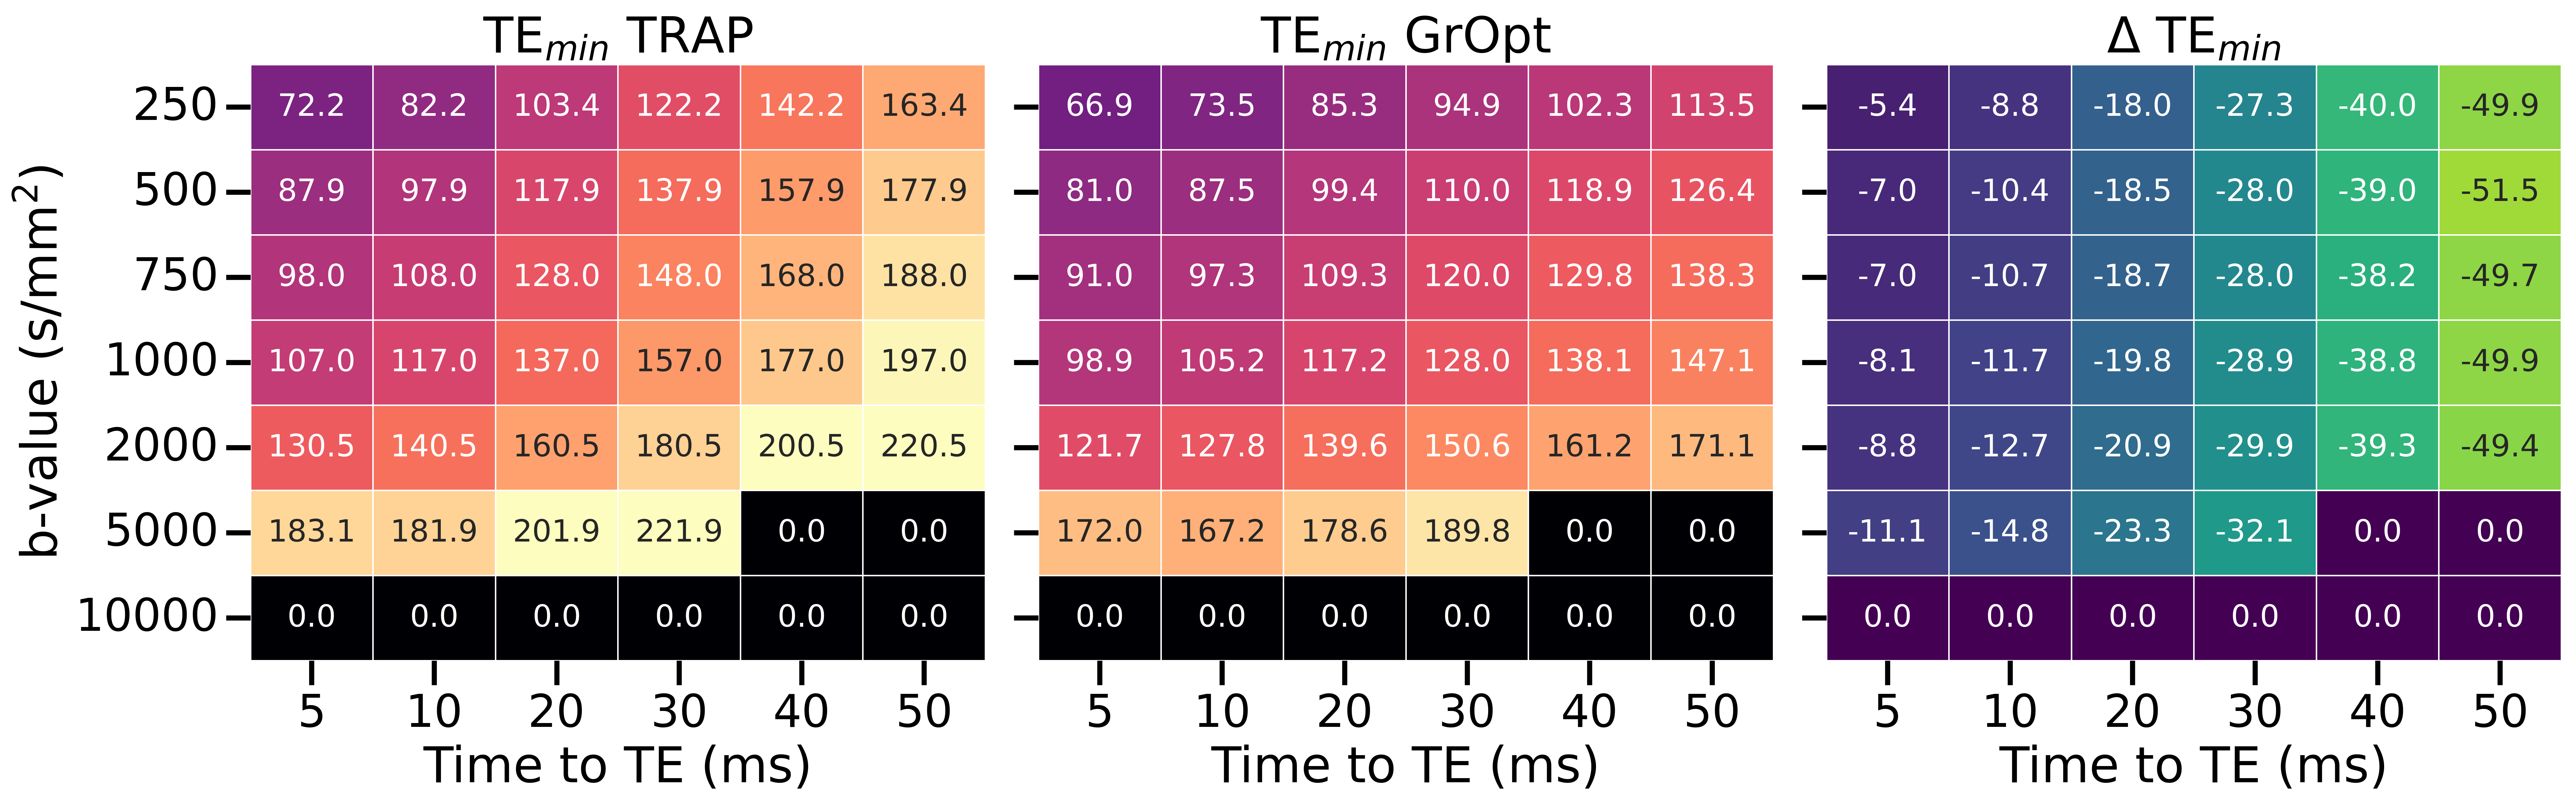

In [4]:
bval = [250, 500, 750, 1000, 2000, 5000, 10000]
T_readout = [5, 10, 20, 30, 40, 50]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")  # or "notebook", "paper", "poster" for 
rc={"font.size": 18, 
    "axes.titlesize": 20, 
    "axes.labelsize": 25, 
    "xtick.labelsize": 23, 
    "ytick.labelsize": 23}

# Read in the CSV files

df1 = pd.read_csv('results_gropt_mmt' + str(mmt) + '_' + str(system) + '.csv',header=  None)

df0 = pd.read_csv('results_trap_mmt' + str(mmt) + '_' + str(system)+ '.csv',header=  None)

# Set the style to darkgrid

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6),sharex = True, sharey=True,dpi = 500)  # 1 row, 3 columns

# Plot df1
sns.heatmap(df0, cmap='magma', cbar = False,annot=True, fmt=".1f", linewidths=.5, ax=axes[0], vmin = 0, vmax = 200,xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[0].set_title('TE$_{min}$ TRAP')
axes[0].set_xlabel('Time to TE (ms)')
axes[0].set_ylabel('b-value (s/mm$^2$)')

# Plot df0
sns.heatmap(df1, cmap='magma',cbar = False, annot=True, fmt=".1f", linewidths=.5, ax=axes[1], vmin = 0, vmax = 200, xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[1].set_title('TE$_{min}$ GrOpt')
axes[1].set_xlabel('Time to TE (ms)')


# Plot df1 - df0
sns.heatmap(df1 - df0, cmap='viridis_r', cbar = False, annot=True, fmt=".1f", linewidths=.5, ax=axes[2], vmin=-60, vmax=0, xticklabels=T_readout, yticklabels=bval,annot_kws={"fontsize":15})
axes[2].set_title('$\Delta$ TE$_{min}$')
axes[2].set_xlabel('Time to TE (ms)')


plt.tight_layout()

fig.savefig('test_mmt' + str(mmt) + '.svg',transparent=True)
plt.show()

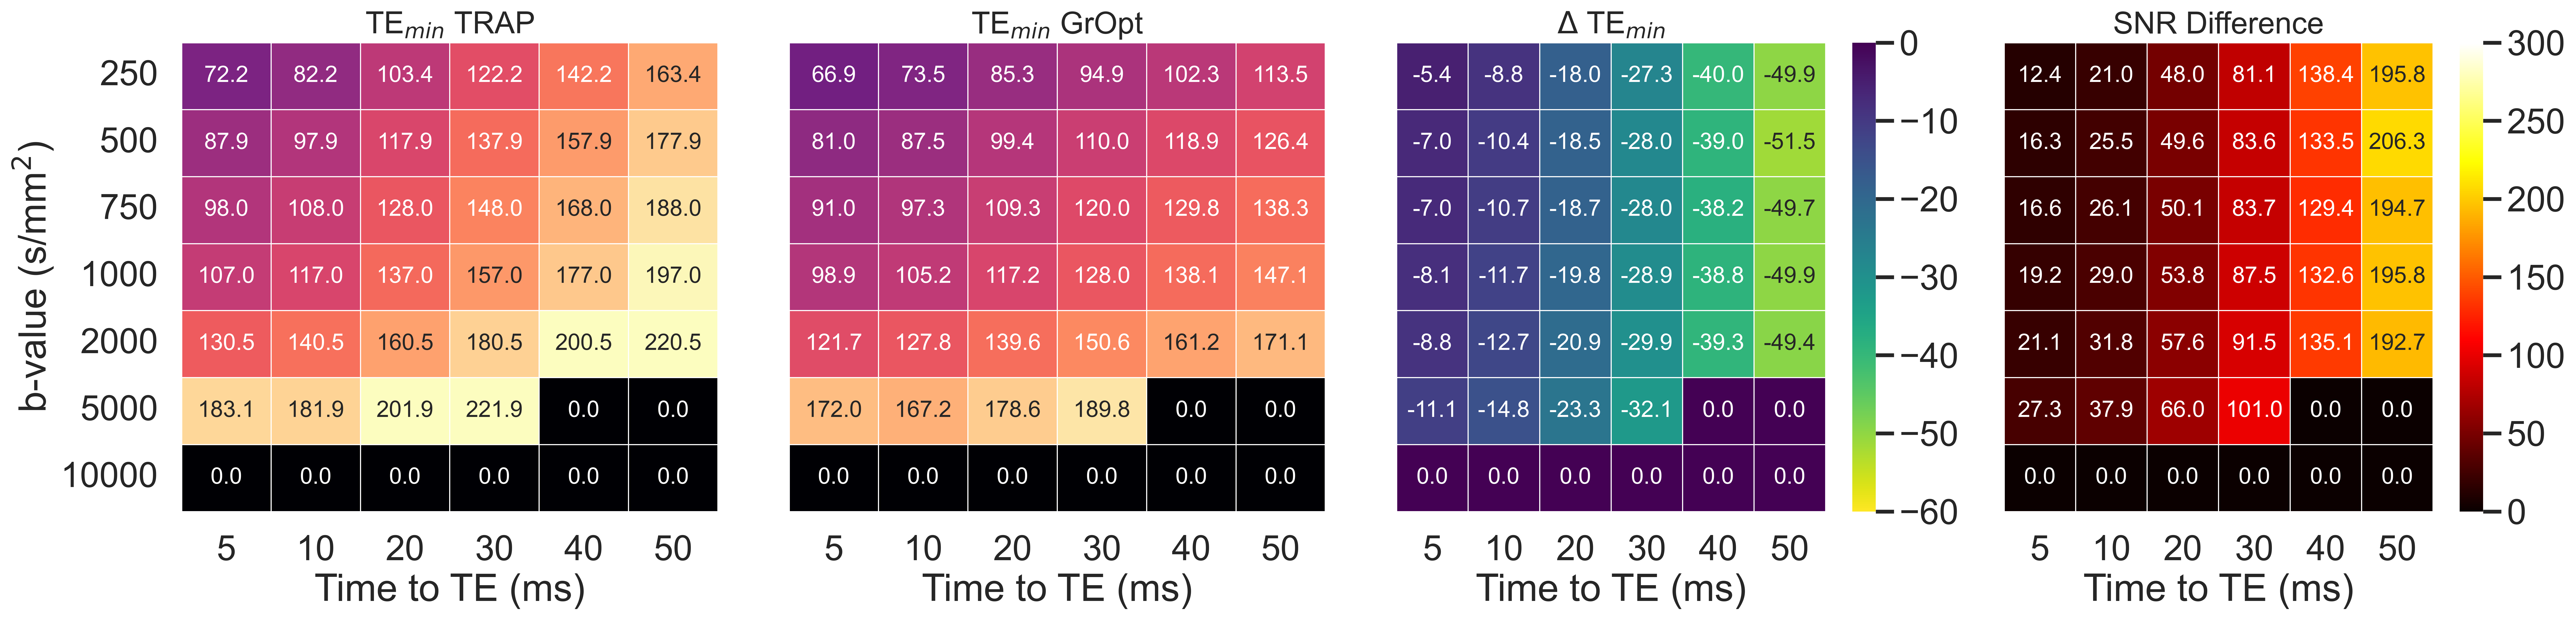

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster", rc={"font.size": 18, 
                              "axes.titlesize": 20, 
                              "axes.labelsize": 25, 
                              "xtick.labelsize": 23, 
                              "ytick.labelsize": 23})

# b-values and readout times
bval = [250, 500, 750, 1000, 2000, 5000, 10000]
T_readout = [5, 10, 20, 30, 40, 50]



# Set the style to darkgrid
sns.set_style("darkgrid")

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=True, dpi=500)  # 1 row, 4 columns

# Plot df0
sns.heatmap(df0, cmap='magma', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[0], vmin=0, vmax=200, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[0].set_title('TE$_{min}$ TRAP')
axes[0].set_xlabel('Time to TE (ms)')
axes[0].set_ylabel('b-value (s/mm$^2$)')

# Plot df1
sns.heatmap(df1, cmap='magma', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[1], vmin=0, vmax=200, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[1].set_title('TE$_{min}$ GrOpt')
axes[1].set_xlabel('Time to TE (ms)')

# Plot df1 - df0
sns.heatmap(df1 - df0, cmap='viridis_r', cbar=True, annot=True, fmt=".1f", linewidths=.5, ax=axes[2], vmin=-60, vmax=0, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[2].set_title('$\Delta$ TE$_{min}$')
axes[2].set_xlabel('Time to TE (ms)')

# Calculate SNR difference and plot
tissue = 46  # Replace with appropriate tissue parameter if needed
difference = (np.exp(-df1/tissue) - np.exp(-df0/tissue)) / np.exp(-df0/tissue) * 100
sns.heatmap(difference, cmap='hot', cbar=True, annot=True, fmt=".1f", linewidths=.5, ax=axes[3], vmin=0, vmax=300, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[3].set_title('SNR Difference')
axes[3].set_xlabel('Time to TE (ms)')

plt.tight_layout()

# Save the figure
fig.savefig('test_mmt' + str(mmt) + '.svg', transparent=True)
plt.show()

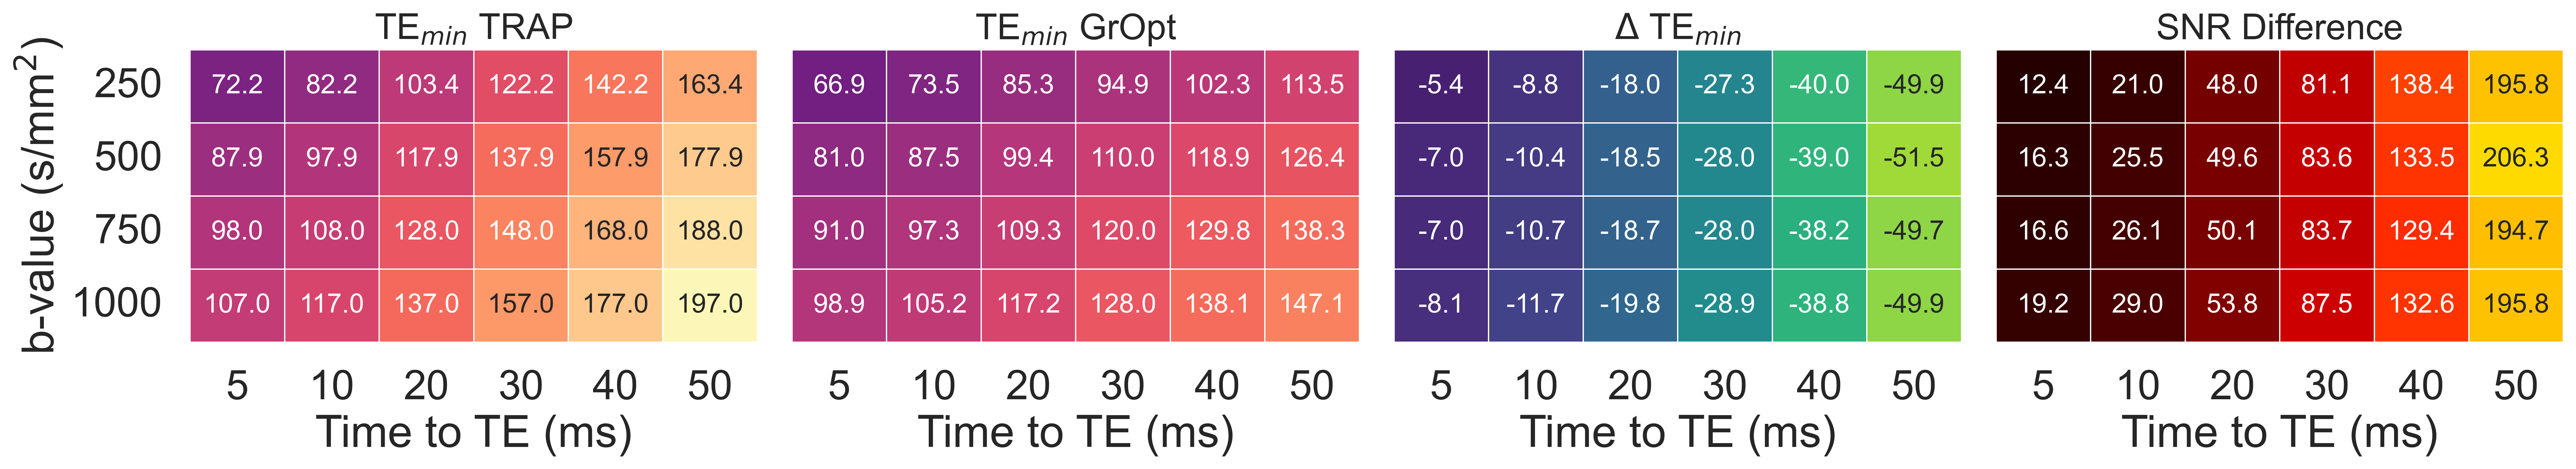

In [6]:
# Filter the data to only include rows corresponding to b-values up to 1000

# b-values and readout times
bval = [250, 500, 750, 1000]  # Only up to 1000
T_readout = [5, 10, 20, 30, 40, 50]
df1_filtered = df1.iloc[:len(bval), :]
df0_filtered = df0.iloc[:len(bval), :]

# Set the style to darkgrid
sns.set_style("darkgrid")

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True, dpi=500)  # 1 row, 4 columns

# Plot df0_filtered
sns.heatmap(df0_filtered, cmap='magma', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[0], vmin=0, vmax=200, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[0].set_title('TE$_{min}$ TRAP')
axes[0].set_xlabel('Time to TE (ms)')
axes[0].set_ylabel('b-value (s/mm$^2$)')

# Plot df1_filtered
sns.heatmap(df1_filtered, cmap='magma', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[1], vmin=0, vmax=200, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[1].set_title('TE$_{min}$ GrOpt')
axes[1].set_xlabel('Time to TE (ms)')

# Plot df1_filtered - df0_filtered
sns.heatmap(df1_filtered - df0_filtered, cmap='viridis_r', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[2], vmin=-60, vmax=0, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[2].set_title('$\Delta$ TE$_{min}$')
axes[2].set_xlabel('Time to TE (ms)')

# Calculate SNR difference and plot
tissue = 46  # Replace with appropriate tissue parameter if needed
difference = (np.exp(-df1_filtered/tissue) - np.exp(-df0_filtered/tissue)) / np.exp(-df0_filtered/tissue) * 100
sns.heatmap(difference, cmap='hot', cbar=False, annot=True, fmt=".1f", linewidths=.5, ax=axes[3], vmin=0, vmax=300, xticklabels=T_readout, yticklabels=bval, annot_kws={"fontsize":15})
axes[3].set_title('SNR Difference')
axes[3].set_xlabel('Time to TE (ms)')

plt.tight_layout()
for ii in range(3):
    axes[ii].yaxis.set_tick_params(rotation=0) 

# Save the figure
fig.savefig('test_mmt' + str(mmt) + '_' + str(system) + '.svg', transparent=True)
plt.show()